# MLP for image classification

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## Normalize data

$$X' = \frac{X-X_{min}}{X_{max}-X_{min}}$$

In [5]:
print(f"min: {X_train.min()}, max: {X_train.max()}")

X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
X_test.min(), X_test.max()

min: 0, max: 255


(0.0, 1.0)

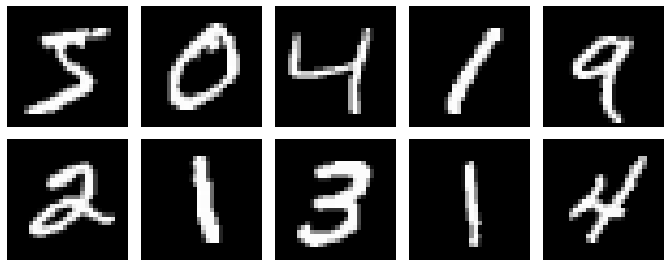

In [14]:
def display_images(data, nrows=2, ncols=5, figsize=(12, 4)):

    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i, :, :], cmap="gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0)

display_images(X_train)

## MLP model

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

def MLP_model(nodes = None, names = None, activations = []):
    model = Sequential(name = "MLP_model")
    model.add(Flatten(input_shape = (28,28), name = "input_layer"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(Dense(node, name = name, activation = activation))
    
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

    return model

model_1 = MLP_model(nodes = [10], names = ["Output_layer"], activations=["softmax"])
model_1.summary()
# 28x28 -> 784 -> 784 weights & 1 bias -> 785 * 10 (output nodes) -> 7850  

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 Output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_1.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=0)

In [18]:
metrics = pd.DataFrame(model_1.history.history)
metrics.index = range(len(metrics))
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.507212,0.86820,0.309986,0.9148
1,0.317093,0.91132,0.282436,0.9200
2,0.292826,0.91760,0.271297,0.9254
3,0.281404,0.92144,0.262994,0.9261
4,0.273708,0.92328,0.260869,0.9292


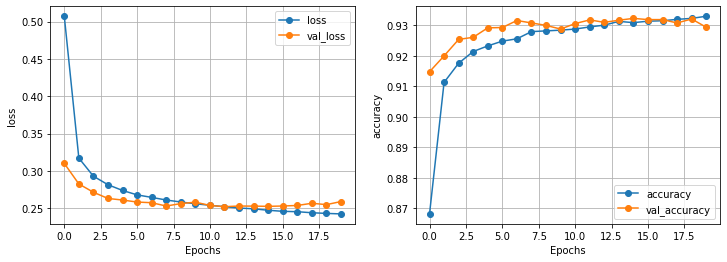

In [20]:
def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    columns = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, col in zip(axes, columns):
        df_history.plot(y=col, xlabel="Epochs",
                        ylabel=col[0], ax=ax, style=style)
        ax.grid()

plot_metrics(metrics)

## Hidden layers

In [21]:
model_2 = MLP_model(nodes=[128, 128, 10], activations=[
                    "relu", "relu", "softmax"], names=["Hidden1", "Hidden2", "Output"])
model_2.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden1 (Dense)             (None, 128)               100480    
                                                                 
 Hidden2 (Dense)             (None, 128)               16512     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_2.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)


Epoch 1/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2473 - accuracy: 0.9271 - val_loss: 0.1199 - val_accuracy: 0.9620
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1045 - accuracy: 0.9670 - val_loss: 0.1019 - val_accuracy: 0.9689
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0720 - accuracy: 0.9777 - val_loss: 0.0952 - val_accuracy: 0.9736
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0547 - accuracy: 0.9831 - val_loss: 0.0859 - val_accuracy: 0.9750
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0416 - accuracy: 0.9867 - val_loss: 0.0893 - val_accuracy: 0.9762
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0336 - accuracy: 0.9889 - val_loss: 0.0951 - val_accuracy: 0.9752
Epoch 7/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.0950 - val_acc

In [28]:
metrics = pd.DataFrame(model_2.history.history)
metrics.index = range(len(metrics))


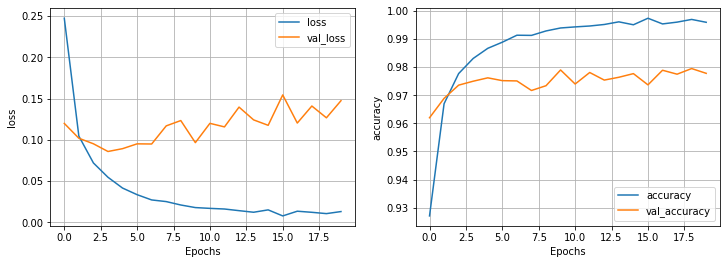

In [29]:
plot_metrics(metrics, style = "-")

In [30]:
model_3 = MLP_model(nodes=[128, 128, 10], activations=[
                    "relu", "relu", "softmax"], names=["Hidden1", "Hidden2", "Output"])
model_3.fit(X_train, y_train, epochs = 5, verbose = 1) # early stopping, and train on all training data

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2287 - accuracy: 0.9325
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0974 - accuracy: 0.9704
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0676 - accuracy: 0.9792
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0506 - accuracy: 0.9843
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0394 - accuracy: 0.9873


## Prediction and evaluation

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.97      0.97       982
           5       0.99      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.95      0.98      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



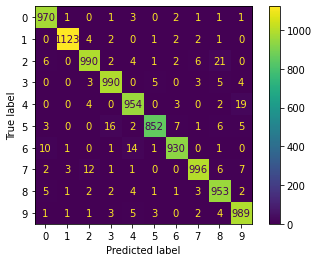

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_3.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## Misclassification

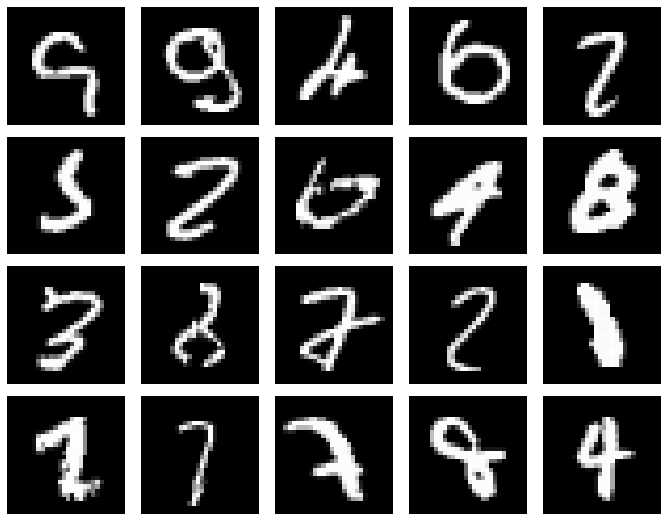

In [38]:
misclassified_indices = np.where(y_pred != y_test)
misclassified_samples = X_test[misclassified_indices]

display_images(misclassified_samples, 4,5, (12,8))